* Pixels store values. Values themselves are good features of an image—they can tell you about image statistics, but almost nothing more.
* Values group together according to image content—dark to light transitions form borders, and borders divide scenes into different objects.
* Borders connect together and reveal contours. Contours play an important role in many computer vision algorithms.
*  They help to find objects, to separate one instance of something from another, and finally, to understand the whole scene.

###Binarization of grayscale images using the Otsu algorithm

##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [ ]:
#Library Import
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto
import random

Using matplotlib backend: agg


Shape: (220, 220)
Data type: uint8
RGB Color Space


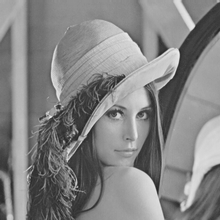

In [ ]:
#Read the test image:
image = cv2.imread('/content/Lenna.png', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)


#Estimate the threshold using Otsu's method:[Otsu's Method](https://learnopencv.com/otsu-thresholding-with-opencv/)

* Otsu’s Binarization is used to perform automatic image thresholding. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image.

* For this, **cv2.threshold()** function is used, but pass an extra flag, ***cv2.THRESH_OTSU***. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

* Otsu's method estimates the threshold for grayscale images in such a way that after binarization and converting the original image to a binary mask, the total intra-class variance for two classes is minimal.

* Otsu's method can be used with the help of the cv2.threshold function, having specified the flag cv2.THRESH_OTSU.


```
 Syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)
Parameters:
* source: Input Image array (must be in Grayscale).
* thresholdValue: Value of Threshold below and above which pixel values will change accordingly.
* maxVal: Maximum value that can be assigned to a pixel.
* thresholdingTechnique: The type of thresholding to be applied.
```

In [ ]:
# Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', ret)

Estimated threshold (Otsu): 124.0


original image


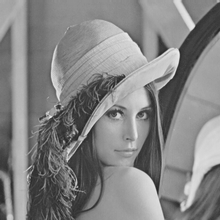

Otsu threshold


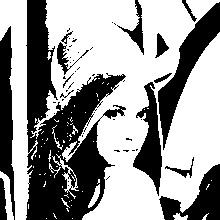

In [ ]:
print('original image')
cv2_imshow(image)

print('Otsu threshold')
cv2_imshow(img_otsu_binary)

### Finding external and internal contours in a binary image

* **Contours:** an outline representing or bounding the shape or form of something.

* A **contour line** indicates a curved line representing the boundary of the same values or the same intensities.

* Having contours extracted from a binary image gives you an alternative image representation and allows you to apply contour-specific image analysis methods.



# Difference between edges and contours?
* The concept of edges lies in a local range while the concept of contours is at the overall boundary of a figure.
* Edges are points whose values change significantly compared to their neighboring points.
* Contours, on the other hand, are closed curves which are obtained from edges and depicting a boundary of figures.

# Contours are extracted using the OpenCV function cv2.findContours. It supports different contour [contours](https://towardsdatascience.com/computer-vision-for-beginners-part-4-64a8d9856208)
extraction modes:
* cv2.RETR_EXTERNAL: For extracting only external contours
* cv2.RETR_CCOMP: For extracting both internal and external contours, and organizing them into a two-level
hierarchy
* cv2.RETR_TREE: For extracting both internal and external contours, and organizing them into a tree graph
* cv2.RETR_LIST: For extracting all contours without establishing any relationships

Shape: (480, 640)
Data type: uint8
RGB Color Space


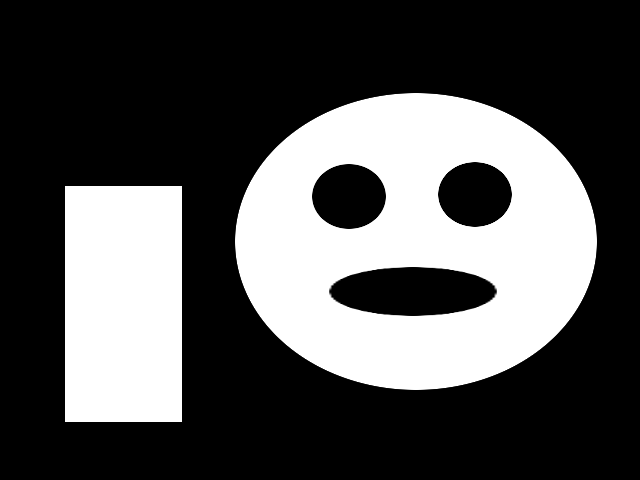

In [ ]:
# Load the test binary image:
image = cv2.imread('/content/BnW.png', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)

# Find the external and internal contours. Organize them into a two-level hierarchy:

* cv2.CHAIN_APPROX_SIMPLE :- returns only the endpoints that are necessary for drawing the contour line.

In [ ]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Prepare the external contour binary mask:

image_external = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image_external, contours, i, 255, -1)

In [ ]:
# Prepare the internal contour binary mask:

image_internal = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 255, -1)

In [ ]:
#Visualize the results:

plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('external')
plt.imshow(image_external, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('internal')
plt.imshow(image_internal, cmap='gray')
plt.tight_layout()
plt.show()

original image


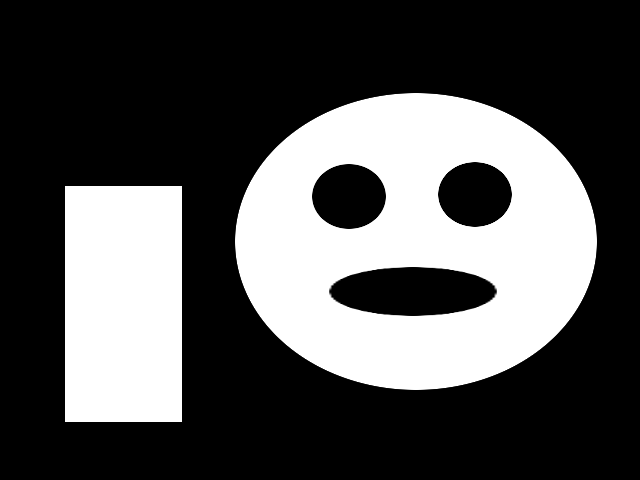

external


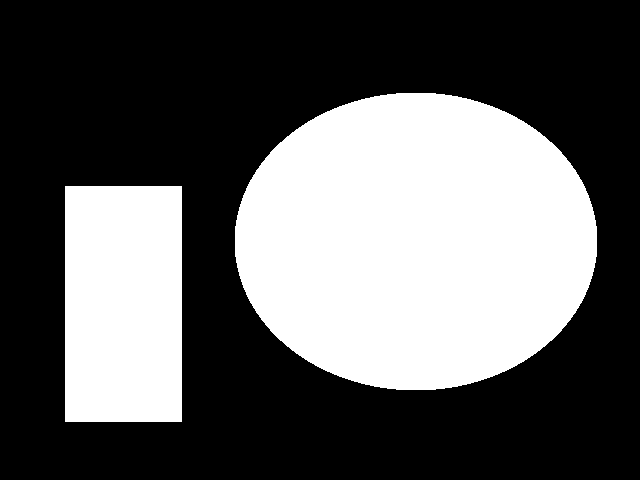

internal


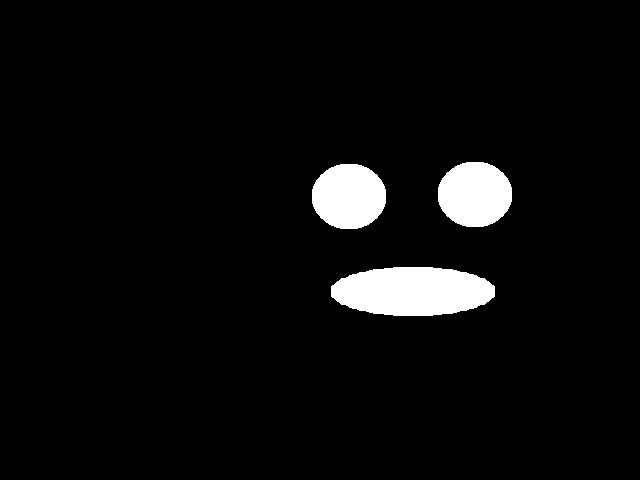

In [ ]:
print('original image')
cv2_imshow(image)

print('external')
cv2_imshow(image_external)

print('internal')
cv2_imshow(image_internal)

# Extracting connected components from a binary image


* Connected components in binary images are areas of non-zero values.
* Each element of each connected component is surrounded by at least one other element from the same component. And different components##
don't touch each other, there are zeros around each one.
* Connected component analysis can be an important part of image processing. Typically (and in OpenCV, it's a fact), finding connected components in an image is much faster than finding all contours.
* So, it's possible to quickly exclude all irrelevant parts of the image according to connected component features (such as area,
centroid location, and so on), to continue working with, remaining areas.

### ASSIGNMENT

### Fitting lines and circles into twodimensional point sets

* Many computer vision algorithms deal with points. They may be contour points, or key points, or something else.
* In some cases, we know that all of these points should lie on the same curve, with a known mathematical shape.
* The process of finding the parameters of the curve (in the case of noisy data) is called approximation.
* we're going to review two functions from OpenCV which find approximations for the ellipse and line for a set of points.

In [ ]:
#Create an image where we're going to draw and randomly generate parameters of the ellipse, such as half axes lengths and rotation angle:

img = np.full((512, 512, 3), 255, np.uint8)

axes = (int(256*random.uniform(0, 1)), int(256*random.uniform(0, 1)))
angle = int(180*random.uniform(0, 1))
center = (256, 256)


In [ ]:
# Generate points for the ellipse with found parameters, and add random noise to them:

pts = cv2.ellipse2Poly(center, axes, angle, 0, 360, 1)
pts += np.random.uniform(-10, 10, pts.shape).astype(np.int32)

Fit ellipse image


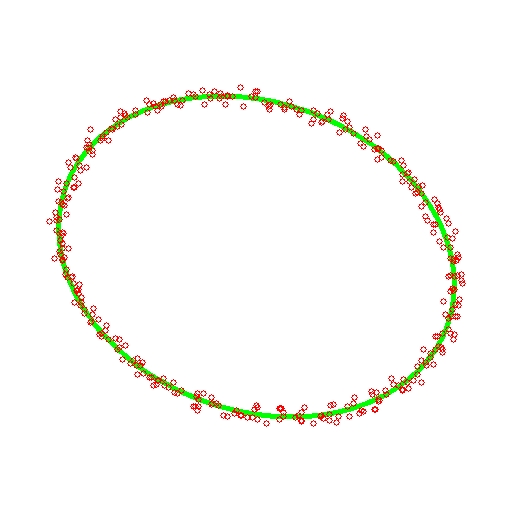

In [ ]:
# Draw out the ellipse and generated points on the image, and display the image:

cv2.ellipse(img, center, axes, angle, 0, 360, (0, 255, 0), 3)

for pt in pts:
    cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0, 0, 255))

print('Fit ellipse image')
cv2_imshow(img)

Fit ellipse image


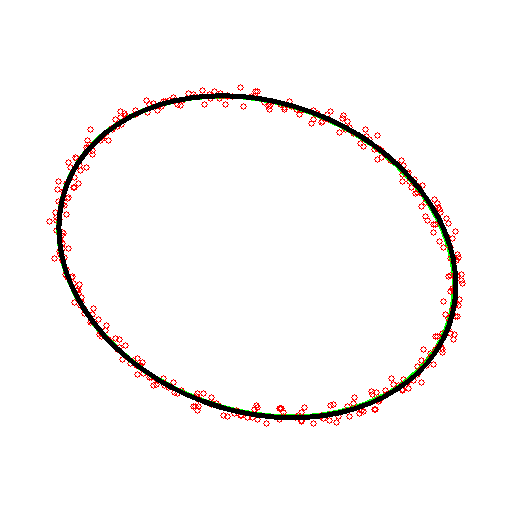

In [ ]:
#Find the parameters of the ellipse which best fits our noisy points, draw the resulting ellipse on the image, and display it:

ellipse = cv2.fitEllipse(pts)
cv2.ellipse(img, ellipse, (0, 0, 0), 3)

print('Fit ellipse image')
cv2_imshow(img)

In [ ]:
# Create a clear image, generate points for the y=x function, and add random noise to them:

img = np.full((512, 512, 3), 255, np.uint8)

pts = np.arange(512).reshape(-1, 1)
pts = np.hstack((pts, pts))
pts += np.random.uniform(-10, 10, pts.shape).astype(np.int32)

Fit Line Image


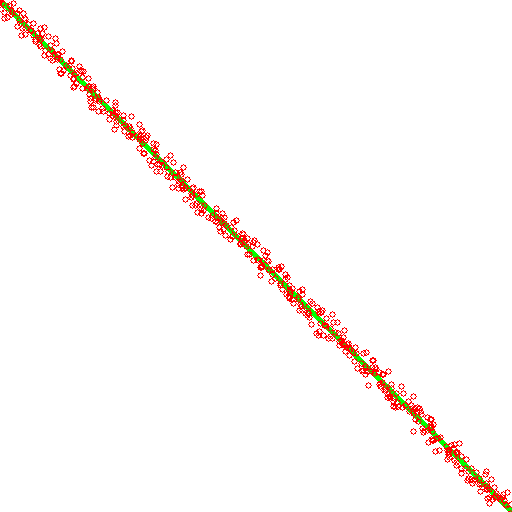

In [ ]:
# Draw the y=x function and generated points; then, display the image:

cv2.line(img, (0,0), (512, 512), (0, 255, 0), 3)

for pt in pts:
  cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0, 0, 255))

print('Fit Line Image')
cv2_imshow(img)


Fit Line Image


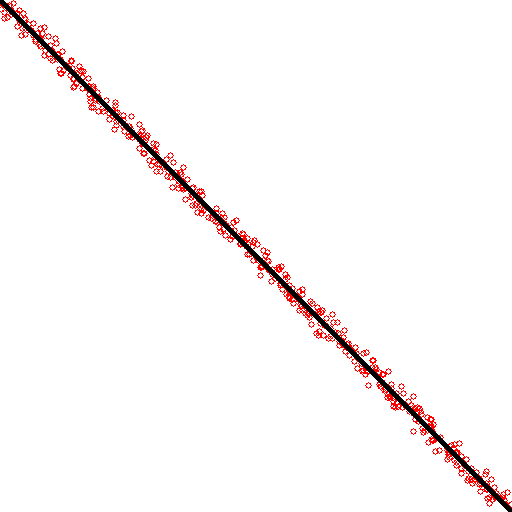

In [ ]:
# Find the parameters of the line for the noised points, draw the result, and display the image:

vx,vy,x,y = cv2.fitLine(pts, cv2.DIST_L2, 0, 0.01, 0.01)
y0 = int(y - x*vy/vx)
y1 = int((512 - x)*vy/vx + y)
cv2.line(img, (0, y0), (512, y1), (0, 0, 0), 3)

print('Fit Line Image')
cv2_imshow(img)


#cv2.fitLine( for function definition

### Working with curves - approximation, length, and area

* computing a curve's length and area, getting the convex hull, and checking whether a curve is convex or not.
* How to approximate the contour with a smaller number of points.
* All of these things can be useful when you're developing an algorithm based on contour handling.
* By finding different features of the contour, you can build heuristics to filter out false contours.

Shape: (512, 512)
Data type: uint8
RGB Color Space


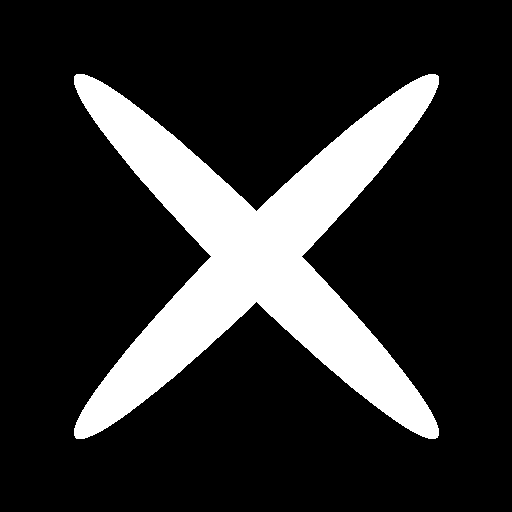

In [ ]:
# Load the test binary image:
#image = cv2.imread('/content/BnW.png', 0)
img = cv2.imread('/content/bw.png', cv2.IMREAD_GRAYSCALE)
print('Shape:', img.shape)
print('Data type:', img.dtype)
print('RGB Color Space')
cv2_imshow(image)

contours


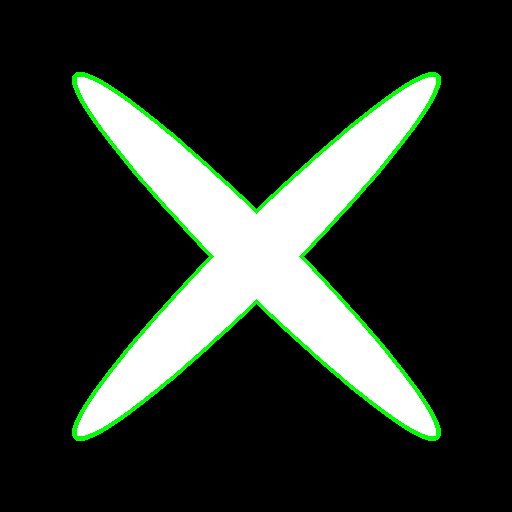

In [ ]:
# Find the contours of the loaded image, draw them, and show the result:

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color, contours, -1, (0,255,0), 3)
print('contours')
cv2_imshow( color)


In [ ]:

# Take the first contour, find its area in various cases, and output the resulting numbers:
contour = contours[0]

print('Area of contour is %.2f' % cv2.contourArea(contour))
print('Signed area of contour is %.2f' % cv2.contourArea(contour[::-1], True))

Area of contour is 47474.00
Signed area of contour is -47474.00
Signed area of contour is 47474.00


In [ ]:
# Find the length of the contour, and print it:

'Length of closed contour is %.2f' % cv2.arcLength(contour, True))
print('Length of open contour is %.2f' % cv2.arcLength(contour, False))

Length of closed contour is 1905.29
Length of open contour is 1897.29


### What is a Convex Hull? [link](https://theailearner.com/2019/12/05/finding-convex-hull-opencv-python/#:~:text=1-,hull%20%3D%20cv2.,convex%20hull%20is%20oriented%20clockwise.)

* Any region/shape is said to be convex if the line joining any two points (selected from the region) is contained entirely in that region. Another way of saying this is, for a shape to be convex, all of its interior angles must be less than 180 degrees or all the vertices should open towards the center.

<p align="center">
    <img src="https://i2.wp.com/theailearner.com/wp-content/uploads/2019/12/convex.jpg?resize=768%2C390&ssl=1">
</p>

contours


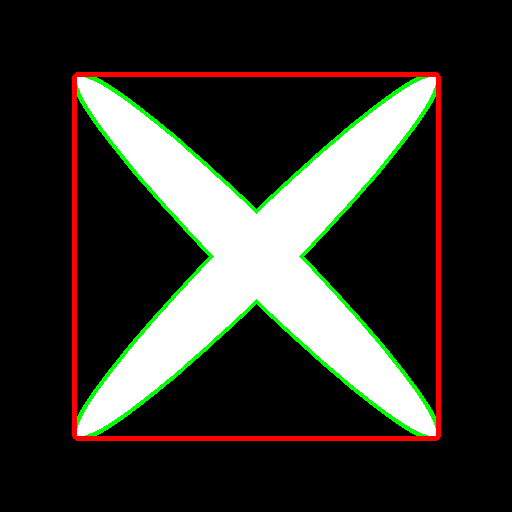

In [ ]:
# Find the convex hull for the contour, draw it on the image, and display it:

hull = cv2.convexHull(contour)
cv2.drawContours(color, [hull], -1, (0,0,255), 3)

print('contours')
cv2_imshow(color)

In [ ]:
# Check the convexity of the contour and its hull:

print('Convex status of contour is %s' % cv2.isContourConvex(contour))
print('Convex status of its hull is %s' % cv2.isContourConvex(hull))

Convex status of contour is False
Convex status of its hull is True


### Applications:
* Collision detection or avoidance, Shape analysis and many more.

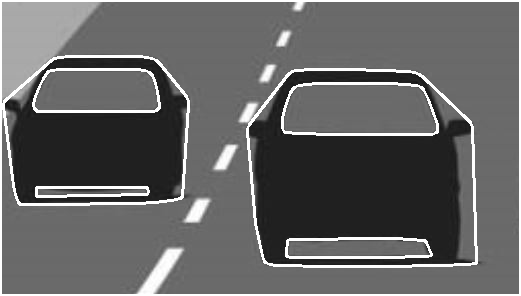

In [ ]:
import cv2
# Load the image
img1 = cv2.imread('/content/cars.jpg', cv2.IMREAD_GRAYSCALE)
# Convert it to greyscale
#img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# Threshold the image
ret, thresh = cv2.threshold(img1,50,255,0)
# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# For each contour, find the convex hull and draw it
# on the original image.
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)
# Display the final convex hull image
cv2_imshow(img1)


### Merging Two Images

Shape: (800, 513)
Data type: uint8
RGB Color Space


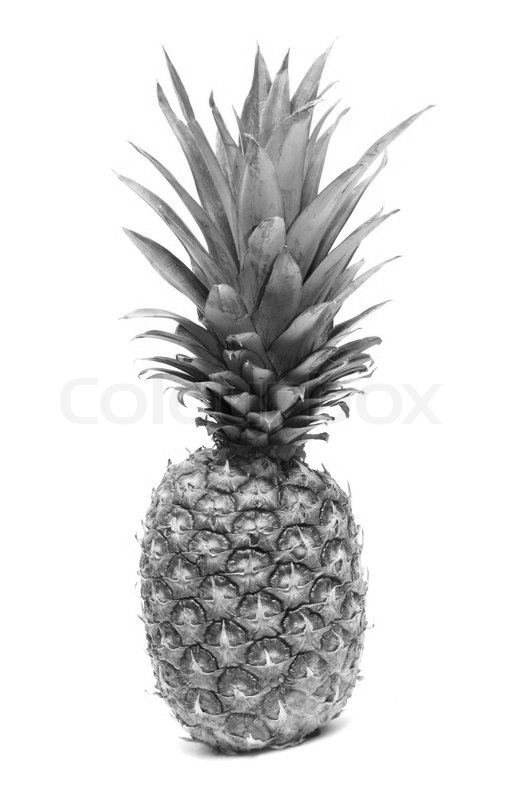

In [ ]:
# Load the image
img = cv2.imread('/content/pineapple.jpg', 0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Shape:', img.shape)
print('Data type:', img.dtype)
print('RGB Color Space')
cv2_imshow(img)

 convert the image from grayscale to binary

In [ ]:
# Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', ret)

Estimated threshold (Otsu): 184.0


original image


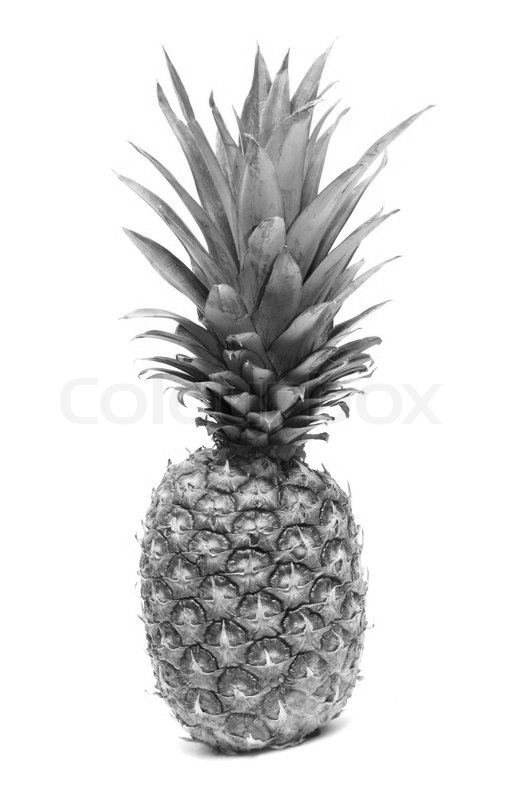

Otsu threshold


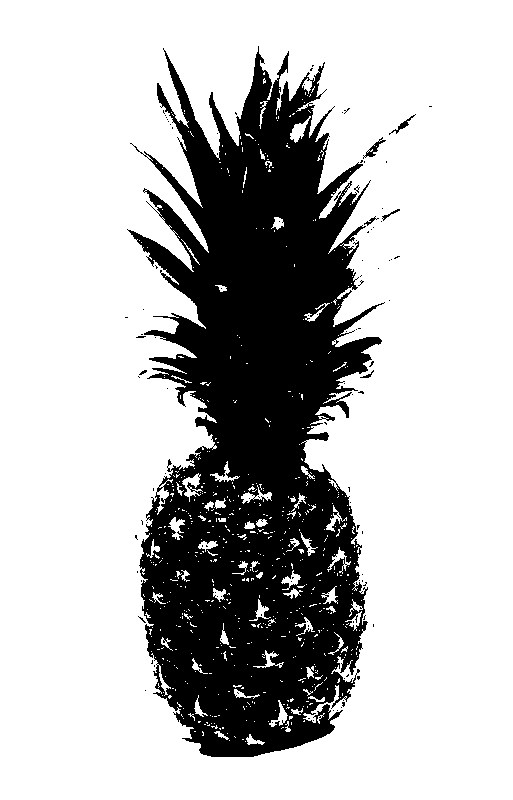

In [ ]:
print('original image')
cv2_imshow(img)

print('Otsu threshold')
cv2_imshow(img_otsu_binary)

In [ ]:
_, thresh = cv2.threshold(img_otsu_binary, 184, 255,cv2.THRESH_BINARY_INV)


THRESH_BINARY_INV


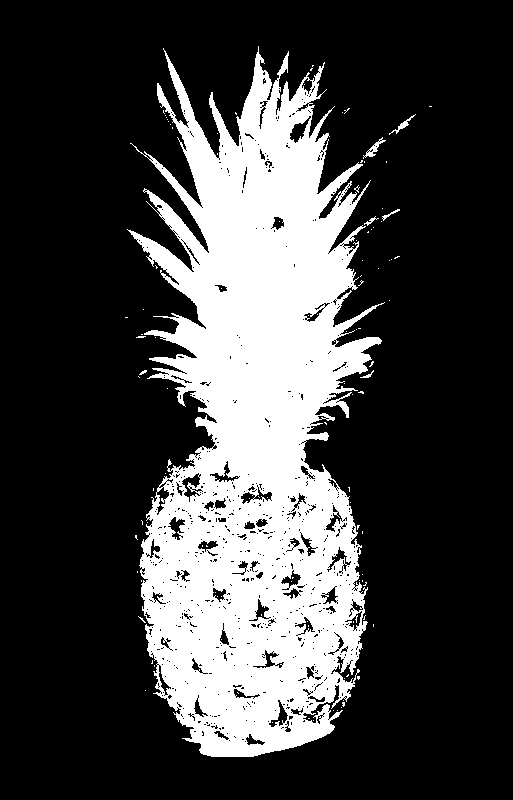

In [ ]:
print('THRESH_BINARY_INV')
cv2_imshow(thresh)

In [ ]:
# Find the contour of the figure
contours, hierarchy = cv2.findContours(
                                   image = thresh,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Sort the contours
contours = sorted(contours, key = cv2.contourArea, reverse = True)
# Draw the contour
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)


Image with contour


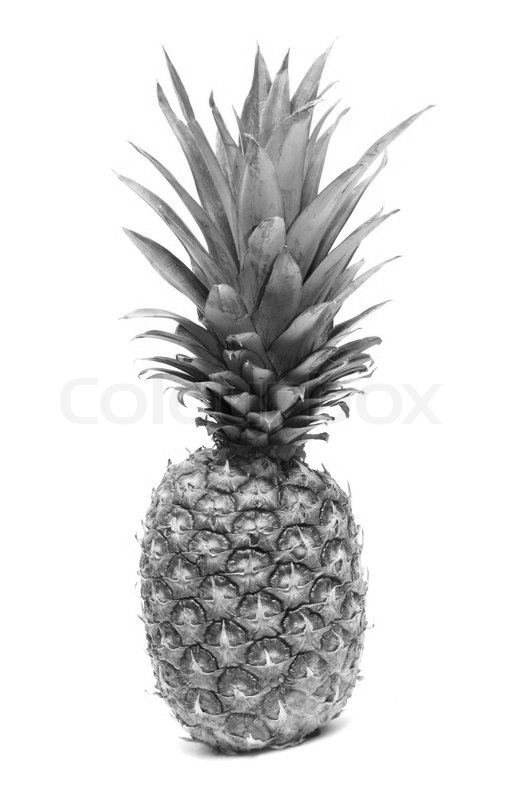

In [ ]:
#plt.imshow(img_copy)
print('Image with contour')
cv2_imshow(img_copy)

## Drawbacks of Thresholding and Contour Detections:
* Not useful when extracting touching or overlapping objects in images.
* Ex: extract each individual coin from the image below.

 <p align="center">
    <img src="https://www.pyimagesearch.com/wp-content/uploads/2015/10/watershed_output_coins_02.jpg">
</p>

Shape: (348, 500)
Data type: uint8
RGB Color Space


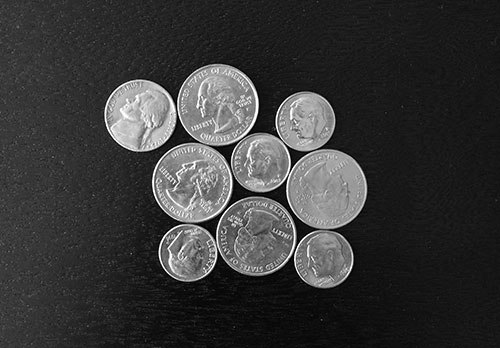

In [ ]:
#Read the test image:
image = cv2.imread('/content/watershed_coins_01_contour.jpg', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)

Estimated threshold (Otsu): 93.0
original image


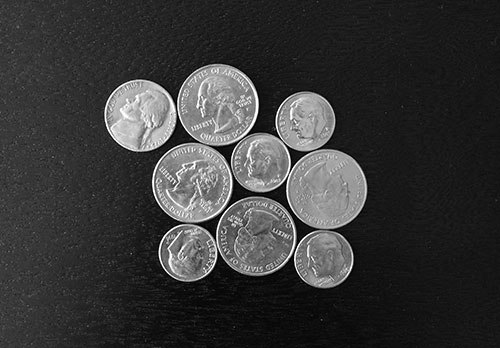

Otsu threshold


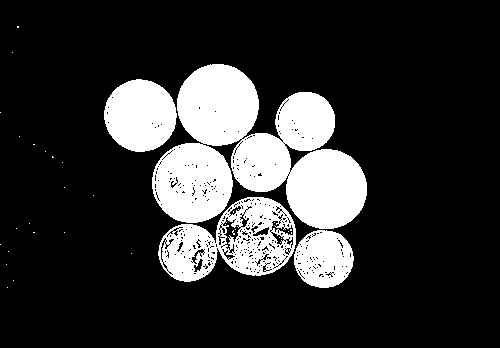

In [ ]:
# Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', ret)



print('original image')
cv2_imshow(image)

print('Otsu threshold')
cv2_imshow(img_otsu_binary)

Number of Coins using - Thresholding and Contour Detections 


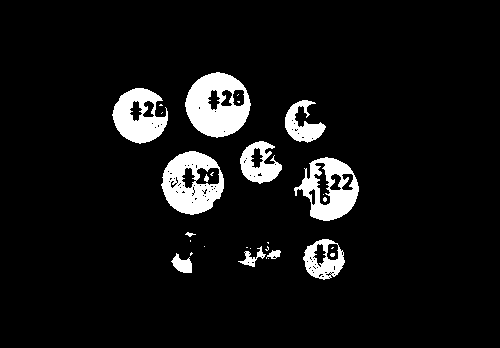

In [ ]:
# Find the contours of the loaded image, draw them, and show the result:

contours, hierarchy = cv2.findContours(img_otsu_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# loop over the contours
for (i, c) in enumerate(contours):
	# draw the contour
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(img_otsu_binary, "#{}".format(i + 1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(img_otsu_binary, [c], -1, (0, 255, 0), 2)


print('Number of Coins using - Thresholding and Contour Detections ')
cv2_imshow(img_otsu_binary)

[**Morphological Transformations**](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

* Morphological transformations are some simple operations based on the image shape.
* It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation.
* Two basic morphological operators are Erosion and Dilation.
* Other varients includes Opening, Closing, Gradient etc also comes into play.
* Consider the following image to understand the Morphological transformations:
<p align="center">
    <img src="https://docs.opencv.org/4.x/j.png">
</p>


```
# This is formatted as code
```



**1. Erosion**
* The basic idea: Erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white).
* Working: The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).
* All the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises.

Syntax:  

```
cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
Parameters:
src: It is the image which is to be eroded .
kernel: A structuring element used for erosion. If element = Mat(), a 3 x 3 rectangular structuring element is used. Kernel can be created using getStructuringElement.
dst: It is the output image of the same size and type as src.
anchor: It is a variable of type integer representing anchor point and it’s default value Point is (-1, -1) which means that the anchor is at the kernel center.
borderType: It depicts what kind of border to be added. It is defined by flags like cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc.
iterations: It is number of times erosion is applied.
borderValue: It is border value in case of a constant border.
Return Value: It returns an image.
```

* Application Erosion:
* * It is useful for removing small white noises.
* * Used to detach two connected objects etc.

In [ ]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
#dilation = cv2.dilate(img,kernel,iterations = 1)
erosion = cv2.erode(img, kernel, iterations=1)

print('Eroded image')
cv2_imshow(erosion)


<p align="center">
    <img src="https://opencv24-python-tutorials.readthedocs.io/en/latest/_images/erosion.png">
</p>


* Dilation:
** It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’.
* * It increases the white region in the image or size of foreground object increases.
* * In cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it.
* Since noise is gone, they won’t come back, but our object area increases.
* It is also useful in joining broken parts of an object.

In [ ]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

print('Dilated image')
cv2_imshow(dilation)

<p align="center">
    <img src="https://opencv24-python-tutorials.readthedocs.io/en/latest/_images/dilation.png">
</p>

###  [Watershed Algorithm:](http://datahacker.rs/007-opencv-projects-image-segmentation-with-watershed-algorithm/)[link 2](https://people.cmm.minesparis.psl.eu/users/beucher/wtshed.html)
* The watershed algorithm is used for segmentation and is especially useful when extracting touching or overlapping objects in images.
* When using the watershed algorithm we must start with user-defined markers.
* These markers can be either manually defined via point-and-click, or we can automatically or heuristically define them using methods such as thresholding and/or [morphological operations](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html).
* Based on these markers, the watershed algorithm treats pixels in our input image as local elevation called a **topography** — this method “floods” valleys, starting from the markers and moving outwards, until the valleys of different markers meet each other.
* In order to obtain an accurate watershed segmentation, the markers must be correctly placed.

* To understand the “philosophy” behind the watershed algorithm we need to think of a grayscale image as a topographic surface.
* In such an image high-intensity pixel values represent peaks (white areas), whereas low-intensity values represent valleys – local minima (black areas).
* Now, imagine that we start filling every isolated valley with water. What will happen? Well, the rising water from different valleys will start to merge. To avoid that, we need to build barriers in the locations where the water would merge. These barriers we call watershed lines and they are used to determine segment boundaries.
* Then, we continue filling water and building watershed until the water level reaches the height of the highest peak.
* At the end of the process, only watershed lines will be visible and that will be the final segmentation result. So, we can conclude that the goal of this algorithm is to identify watershed lines.

<p align="center">
    <img src="http://media5.datahacker.rs/2020/09/lpe1.gif">
</p>

In [ ]:
#import the necessary libraries
import cv2
import numpy as np
import skimage
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

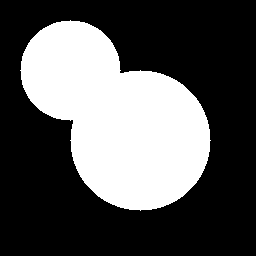

In [ ]:
# creating a simple binary image of two partially overlapping circles
img = np.zeros((256, 256),dtype="uint8")
cv2.circle(img, (70,70), 50, (255,255,255), (-1))
cv2.circle(img, (140,140), 70, (255,255,255), (-1))
cv2_imshow(img)

## Calculating a distance transform
* The idea is to create a border as far as possible from the centers of the overlapping objects.
* We use the method that works very well on rounded objects and it is called a ***distance transform***.
* It is an operator that generally takes binary images as inputs and pixel intensities of the points inside the foreground regions are replaced by their distance to the nearest pixel with zero intensity (background pixel).

<p align="center">
    <img src="http://media5.datahacker.rs/2020/10/9-1024x542.jpg">
</p>

* As you can see in the image above every pixel with a value of zero (black pixel) also has a distance transform value of 0, as it is the closest zero-valued pixel to itself. On the other hand, the distance transform of the pixels with the value of 1 is given by the following formula:

`d(p1, p2) = \sqrt{{x1-x2}^2+{y1-y2}^2}`

* To apply distance transform in OpenCV we can use the function



```
**cv2.distanceTransform()**. This method consists of the following parameters:

- src − input image.
- dst − output image.
distanceType − A variable that represents the type of distance transformation
- maskSize − A variable representing the mask size (usually it is set to a value 3)
```

F or the parameter distanceType we can choose several different types of a distance transform.
* In our code, we are using a simple Euclidean distance.
```
DIST_USER – User-defined distance
DIST_L1 – distance=|x1−x2|+|y1−y2∣
DIST_L2  – the simple Euclidean distance
DIST_C  – distance=max(|x1−x2|,|y1−y2∣)
```



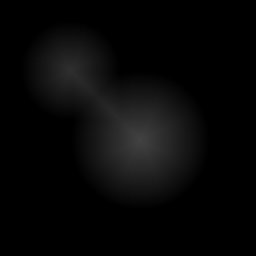

In [ ]:
dist_transform = cv2.distanceTransform(img, cv2.DIST_L2,3)
cv2_imshow(dist_transform)

### Finding local maxima points
* The next step is to find the coordinates of the peaks (local maxima) of the white areas in the image.
* For that, we will use the function peak_local_max()from the Scikit-image library.
* apply this function to our distance_transform image and the output will give us the markers which will be used in the watershed function.

In [ ]:
local_max_location = peak_local_max(dist_transform, min_distance=1, indices=True)
local_max_boolean = peak_local_max(dist_transform, min_distance=1, indices=False)

print(local_max_boolean)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Illustration of working of peak_local_max()

In [ ]:
img1 = np.zeros((7, 7))
img1[2, 2] = 4
img1[2, 4] = 7
print(img1)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


* peak_local_max() function consists of another optional parameter min_distance that determines the minimum number of pixels that separate two peaks in a region. To find the maximum number of peaks we use min_distance=1.

In [ ]:
peak_local_max(img1, min_distance=1)

array([[2, 4],
       [2, 2]])

In [ ]:
peak_local_max(img1, min_distance=2)

array([[2, 4]])

##Labeling the markers
* The next step is to label markers for the watershed function. For that, we will use the function ndi.label()from the SciPy library.
* This function consists of one parameter input which is an array-like object to be labeled.
* the function ndi.label()will randomly label all local maximums with different positive values starting from 1.


In [ ]:
markers, _ = ndi.label(local_max_boolean)

* The final step is to apply the skimage.segmentation.watershed()function from the Scikit-image library.
* As parameters, we need to pass our inverted distance transform image and the markers that we calculated in the previous line of code.
* Since the watershed algorithm assumes our markers represent local minima we need to invert our distance transform image. In that way, light pixels will represent high elevations, while dark pixels will represent the low elevations for the watershed transform.

In [ ]:
segmented = skimage.segmentation.watershed(255-dist_transform, markers, mask=img)

*  plot our original image, inverted distance transform image, and the output image.

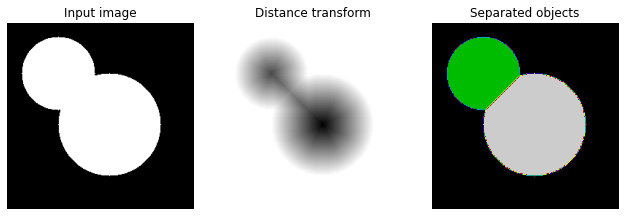

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Input image')
ax[1].imshow(-dist_transform, cmap=plt.cm.gray)
ax[1].set_title('Distance transform')
ax[2].imshow(segmented, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()